<a href="https://colab.research.google.com/github/cut-lip/ML_Practice/blob/main/LinearRegressionPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import required packages
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

####In this exercise, we will practice defining two functions which may be considered as common programming tasks in Machine Learning. These two functions are `build_model(my_learning_rate)` and `train_model(model, feature, label, epochs)`.

In [18]:
#@title Define the functions that build and train a model

def build_model(my_learning_rate):
  """Create and compile a simple linear regression model"""

  # The majority of basic tf.keras models are sequential models.
  # Sequential Model: containing one or more layer
  model = tf.keras.models.Sequential()

  # We wish to describe the topography of the model
  # For a simple linear regression model:
    # Topology: single node in a single layer
  model.add(tf.keras.layers.Dense( units = 1, input_shape = ( 1, ) ))

  # Using the compile function we may compile the model topography into code
  model.compile(optimizer = tf.keras.optimizers.RMSprop( lr = my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  
  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data>"""

  # Feed feature and label values to the model for the given number
  # of epochs in order to learn the model how the feature values
  # relate to the label values.
  history = model.fit( x = feature,
                       y = label,
                       batch_size = batch_size,
                       epochs = epochs )
    
  # We wish to gather the weight and the bias for the trained model
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # Store the list of epochs seperately for the rest of history
  epochs = history.epoch

  # Gather each epoch's history (a snapshot of the epoch)
  hist = pd.DataFrame(history.history)

  # Gather the model's RMS error at each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


#print("Defined build_model and train_model")

###Lets also define some plotting functions using Matplotlib in order to draw two different types of plots:

*   plot of feature vs model values and a line of the trained model output
*   a loss curve


In [9]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values
  plt.scatter( feature, label )

  # Create a line to represent the trained model.
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot( [x0, x1], [y0, y1], c = 'r' )

  # Render the scatter plot and the regression line
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot( epochs, rmse, label = "Loss" )
  plt.legend()
  plt.ylim( [rmse.min() * 0.97, rmse.max()] )
  plt.show()

  print("Defined the plot_the_model and plot_the_loss_curve functions")


###The synthetic data set we define here will consist of twelve examples, each consisting of one label and one feature. The data is 1-D. After defining the data, we wish to specify the hyperparameters for the model.

In [19]:
# Define synthetic data points
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Specify the hyperparameters (learning rate, epochs, batch_size)
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)



Epoch 1/10
1/1 [==============================] - 0s 231ms/step - loss: 197.6321 - root_mean_squared_error: 14.0582
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 190.3767 - root_mean_squared_error: 13.7977
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 185.2444 - root_mean_squared_error: 13.6105
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 181.0242 - root_mean_squared_error: 13.4545
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 177.3342 - root_mean_squared_error: 13.3167
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 173.9976 - root_mean_squared_error: 13.1908
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 170.9163 - root_mean_squared_error: 13.0735
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 168.0293 - root_mean_squared_error: 12.9626
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 165.2958 - ro

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


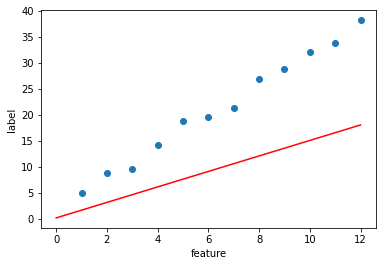

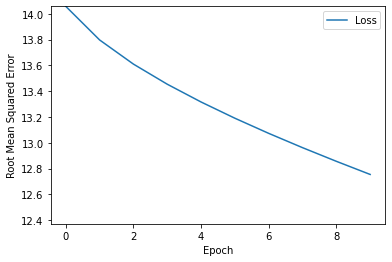

Defined the plot_the_model and plot_the_loss_curve functions


In [20]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

####Obviously, in the scatterplot with the linear regression line, we see that the linear model identified is not very accurate.

####In the case of the second graph, the loss curve, we see that the slope of the curve has not flattened out yet (within 10 epochs). This suggests that the model will benefit from furthur training.

####Lets try increasing the number of epochs in order to hopefully decrease the loss of the linear regression function.

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 228ms/step - loss: 229.9065 - root_mean_squared_error: 15.1627
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 222.0726 - root_mean_squared_error: 14.9021
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 216.5208 - root_mean_squared_error: 14.7146
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 211.9494 - root_mean_squared_error: 14.5585
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 207.9477 - root_mean_squared_error: 14.4204
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 204.3256 - root_mean_squared_error: 14.2942
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 200.9774 - root_mean_squared_error: 14.1767
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 197.8377 - root_mean_squared_error: 14.0655
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 194.8624 - root_m

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


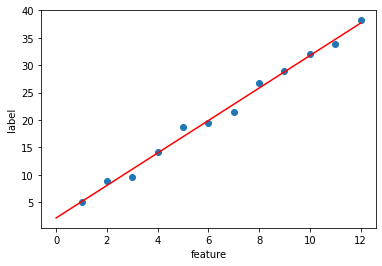

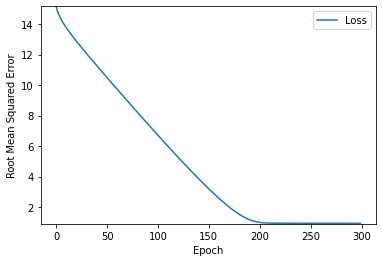

Defined the plot_the_model and plot_the_loss_curve functions


In [24]:
learning_rate=0.01
epochs= 300   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

###As we can see, with 300 epochs, the model eventually does converge (in this case, somewhere shortly after 200 epochs).

###Its funny to see what happens if we set the learning rate too high. Such a parameter will make it impossible for an accurate model to be identified. The loss curve will converge, but on an inaccurate regression. An oscillating loss curve is a sign that the learning rate is too high , as in the following example.

###We may also adjust the batch size (after each iteration of batch is when loss and weights for the model are recalculated). Note than an epoch contains however many batches it takes to train on the entire dataset. Its always possible that the model may train faster on smaller batches. On the other hand, small batches may not contain enough information to make the model converge.

###It is always interesting to note that with the proper values for `epochs` and `learning_rate`, a batch size of one is sufficient for the model to cnverge.

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 243ms/step - loss: 673.2170 - root_mean_squared_error: 25.9464
Epoch 2/40
1/1 [==============================] - 0s 8ms/step - loss: 520.5804 - root_mean_squared_error: 22.8162
Epoch 3/40
1/1 [==============================] - 0s 7ms/step - loss: 428.0380 - root_mean_squared_error: 20.6891
Epoch 4/40
1/1 [==============================] - 0s 12ms/step - loss: 360.4225 - root_mean_squared_error: 18.9848
Epoch 5/40
1/1 [==============================] - 0s 7ms/step - loss: 307.1956 - root_mean_squared_error: 17.5270
Epoch 6/40
1/1 [==============================] - 0s 11ms/step - loss: 263.5959 - root_mean_squared_error: 16.2356
Epoch 7/40
1/1 [==============================] - 0s 8ms/step - loss: 227.0104 - root_mean_squared_error: 15.0669
Epoch 8/40
1/1 [==============================] - 0s 9ms/step - loss: 195.8266 - root_mean_squared_error: 13.9938
Epoch 9/40
1/1 [==============================] - 0s 7ms/step - loss: 168.9680 - root_mean_squa

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


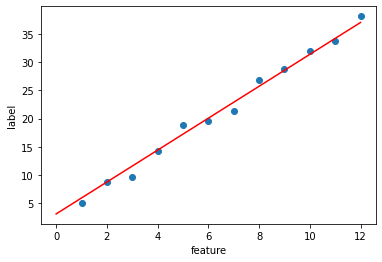

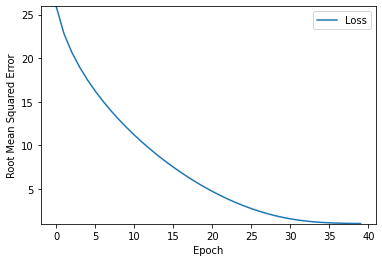

Defined the plot_the_model and plot_the_loss_curve functions


In [32]:
## Now try to find the ideal combination of epoch and learning rate
learning_rate = 0.07
epochs = 40

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)